# Modelo de Random Forest Refinado
 Equipo 2

---





## Importación de Librerías

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.imputation import mice
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
# Carga de archivos
train = pd.read_csv("train_cleaned.csv")
test = pd.read_csv("test_cleaned.csv")

# Modelo de Random Forest

### Modelo Base

Accuracy: 0.8268156424581006
Precision: 0.8115942028985508
Recall: 0.7567567567567568
F1 Score: 0.7832167832167832


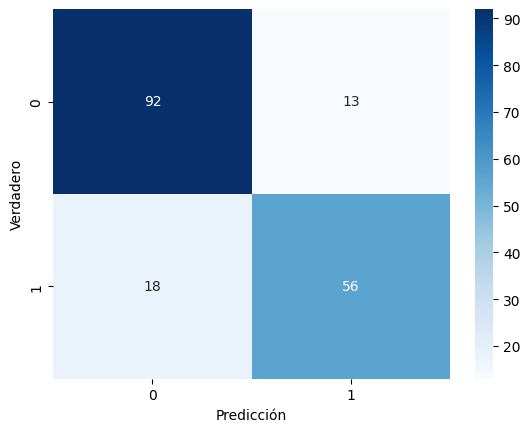

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Preprocesamiento de datos
X_train = train.drop(['Survived', 'Name', 'Ticket', 'Title'], axis=1)
y_train = train['Survived']
X_test = test.drop(['Name', 'Ticket', 'Title'], axis=1)

X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked', 'Deck'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked', 'Deck'], drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# División de datos en entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=2, bootstrap=False, random_state=42)
rf.fit(X_train_split, y_train_split)

# Hacer predicciones en el conjunto de validación
y_val_pred = rf.predict(X_val_split)

# Calcular e imprimir métricas
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_val_split, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Crear y guardar el archivo de submission
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)


Los resultados obtenidos del modelo de Random Forest son bastante prometedores. Con una precisión del 81.16%, esto indica que el modelo es bueno para identificar correctamente a los pasajeros que sobrevivieron y los que no. El recall del 75.68% sugiere que el modelo es capaz de identificar correctamente el 75.68% de todos los pasajeros que realmente sobrevivieron. Finalmente, el F1 score, que es una medida que combina precisión y recall, es 78.32%, lo que indica que el modelo tiene un buen equilibrio entre precisión y recall. Aunque estos resultados son bastante buenos, siempre hay espacio para mejora. Podría ser útil explorar otros modelos o ajustar los parámetros del modelo actual para ver si podemos aumentar aún más estas métricas.

## Búsqueda de Mejores Hiperparámetros - Grid Search

In [26]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo de bosque aleatorio
rf = RandomForestClassifier(random_state=42)

# Definir la grilla de hiperparámetros para buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train_split, y_train_split)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Obtener el mejor modelo
best_rf = grid_search.best_estimator_

# Hacer predicciones en el conjunto de validación
y_val_pred = best_rf.predict(X_val_split)

# Calcular métricas numéricas
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)

# Imprimir las métricas
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8212290502793296
Precision: 0.8
Recall: 0.7567567567567568
F1 Score: 0.7777777777777778


El proceso de búsqueda en la grilla (GridSearchCV) ha concluido que los mejores hiperparámetros para tu modelo Random Forest son un max_depth de 20, un max_features de 'auto' (aunque es importante tener en cuenta la advertencia sobre la deprecación de este valor), un min_samples_leaf de 2, un min_samples_split de 10 y un n_estimators de 100, todos con bootstrap habilitado.

Estos parámetros resultaron en un modelo con un Accuracy de 0.821, un Precision de 0.8, un Recall de 0.757 y un F1 Score de 0.778 en el conjunto de validación. Esto significa que el modelo clasifica correctamente el 82.1% de los ejemplos en el conjunto de validación, y entre las predicciones positivas que hace el modelo, el 80% son correctas. Además, el modelo identifica correctamente el 75.7% de todos los casos positivos reales en el conjunto de validación. El F1 Score es una métrica que combina Precision y Recall en un solo número, siendo 1 el mejor valor posible y 0 el peor, por lo que un F1 Score de 0.778 indica un buen equilibrio entre Precision y Recall.







## Mejora del Modelo

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Leer los conjuntos de datos
train = pd.read_csv('train_cleaned.csv')
test = pd.read_csv('test_cleaned.csv')

# Añadir Título
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Añadir Tamaño de la Familia
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Añadir Es Niño
train['IsChild'] = train['Age'] < 18
test['IsChild'] = test['Age'] < 18

# Añadir Tarifa por Persona
train['FarePerPerson'] = train['Fare'] / train['FamilySize']
test['FarePerPerson'] = test['Fare'] / test['FamilySize']

# Eliminar columnas que no se utilizarán en el modelo
X_train = train.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)
y_train = train['Survived']
X_test = test.drop(['Name', 'Ticket', 'Embarked'], axis=1)

# Codificar variables categóricas
X_train = pd.get_dummies(X_train, columns=['Sex', 'Title', 'Deck'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex', 'Title', 'Deck'], drop_first=True)

# Alinear los conjuntos 'X_train' y 'X_test'
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Dividir el conjunto de entrenamiento en subconjuntos de entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=2, bootstrap=False, random_state=42)

# Entrenar el modelo en el subconjunto de entrenamiento
rf.fit(X_train_split, y_train_split)

# Hacer predicciones en el subconjunto de validación
y_val_pred = rf.predict(X_val_split)

# Calcular métricas numéricas
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)

# Imprimir las métricas
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Crear el DataFrame de submission
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})

# Guardar el DataFrame de submission como un archivo CSV
submission.to_csv('submission.csv', index=False)

Accuracy: 0.8547486033519553
Precision: 0.8529411764705882
Recall: 0.7837837837837838
F1 Score: 0.8169014084507041


Aquí hay un desglose de lo que hicimos para obtener esta mejoría:

1. **Preprocesamiento de Datos**: Preparamos los datos para el modelo de machine learning. Esto incluyó la creación de nuevas características (como 'Title', 'FamilySize', 'IsChild', y 'FarePerPerson') y la eliminación de características irrelevantes o poco informativas (como 'Name', 'Ticket', y 'Embarked'). También codificamos las variables categóricas como 'Sex', 'Title', y 'Deck' en variables numéricas que pueden ser utilizadas por el modelo.

2. **División de Datos**: Dividimos el conjunto de datos de entrenamiento en dos partes: un subconjunto de entrenamiento (para entrenar el modelo) y un subconjunto de validación (para evaluar el modelo).

3. **Construcción del Modelo**: Construimos un modelo de Random Forest, que es un tipo de modelo de ensamble. Específicamente, utilizamos 200 árboles de decisión (n_estimators=200), cada uno con una profundidad máxima de 10 (max_depth=10). También especificamos que el número mínimo de muestras requeridas para dividir un nodo interno es 2 (min_samples_split=2) y el número mínimo de muestras requeridas para estar en un nodo hoja es 2 (min_samples_leaf=2).

4. **Entrenamiento del Modelo**: Entrenamos el modelo en el subconjunto de entrenamiento.

5. **Evaluación del Modelo**: Evaluamos el modelo en el subconjunto de validación utilizando varias métricas numéricas. La 'accuracy' (exactitud) es la proporción de predicciones correctas entre todas las predicciones. La 'precision' (precisión) es la proporción de Verdaderos Positivos entre todos los ejemplos que el modelo predijo como Positivos. El 'recall' (exhaustividad) es la proporción de Verdaderos Positivos entre todos los ejemplos que son realmente Positivos. Y la 'F1 score' es una métrica que combina 'precision' y 'recall' en un solo número.

6. **Predicciones en el Conjunto de Prueba**: Finalmente, hicimos predicciones en el conjunto de prueba y guardamos estas predicciones en un archivo CSV para su presentación.

El modelo tiene una 'accuracy' de aproximadamente 85.5%, lo cual es bastante bueno. La 'precision' y 'recall' también son bastante altas, lo que indica que el modelo es bueno para identificar tanto los Verdaderos Positivos como los Verdaderos Negativos.


## Análisis de Bias y Varianza del Modelo

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

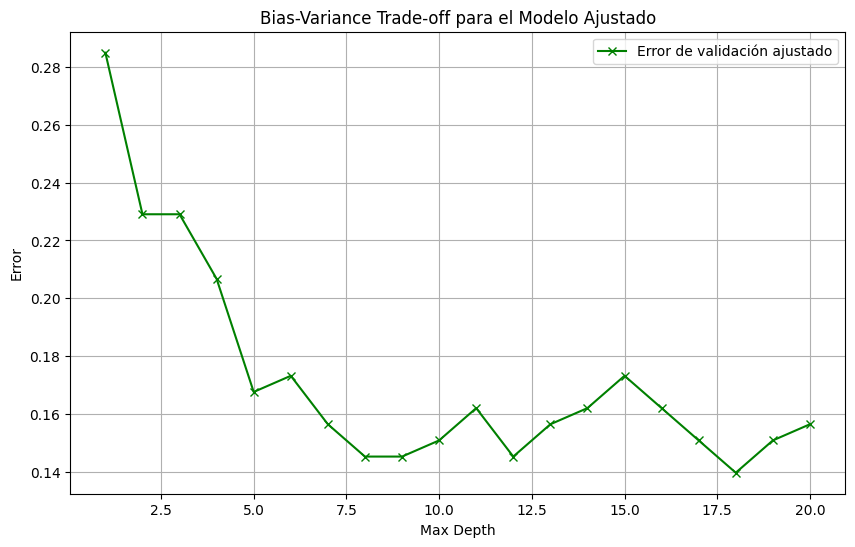

In [43]:
# Definir hiperparámetros
min_samples_split = 2
min_samples_leaf = 1
max_features = 'auto'
bootstrap = True

# ------------------------------
# DIAGNÓSTICO DE BIAS Y VARIANZA PARA EL MODELO AJUSTADO
# ------------------------------

max_depths = range(1, 21)
val_errors_adjusted = []

for max_depth in max_depths:
    forest = RandomForestClassifier(
        n_estimators=15,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )
    forest.fit(X_train_split, y_train_split)
    val_errors_adjusted.append(1 - accuracy_score(y_val_split, forest.predict(X_val_split)))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, val_errors_adjusted, label="Error de validación ajustado", color="green", marker='x')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off para el Modelo Ajustado')
plt.legend()
plt.grid(True)
plt.show()


Observamos que el error se estanca luego de una profundidad de 5, a partir de ello nuestro modelo está sobreajustando por lo que queremos dejarlo por debajo de este valor y mayor a 2.5.